### TP : Traitement du Signal
## Objectif

L'objectif de ce TP est de mesurer la vitesse du son en utilisant le matériel fourni.

## Matériel

- Haut-parleur
- Deux microphones
- Ordinateur avec Python et Jupyter Notebook installés

## Questions

1. Comment peut-on mesurer la vitesse du son ?
2. Comment isoler le signal émis par l'haut-parleur et comment peut-on minimiser les bruits captés par les microphones ?
3. Utiliser les différents signaux afin de déduire lequel est le plus qualitatif.

## Code

Voici le code Python à utiliser pour générer les signaux et enregistrer le son :

```
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitsignfip


data_left, data_right = traitsignfip.play_and_record("whitenoise",2) 
#Acquisition du son des microphones durant 5 secondes, l'haut-parleur émet le son passé en argument pendant X seconde (Ici 2 secondes)
#Renvoie 2 tableaux (Left and Right) car chacun des 2 micros enregistre sur un canal différent. 
#Ainsi deux tableaux permettent de traiter les valeurs de chaque micro.
```


# Code python permettant de réaliser la mesure du son

Temps PIC Gauche : 1.9792743764172336
Temps PIC Droit : 1.9757823129251701
Delta : 0.0034920634920634352
Vitesse : 143.18181818182052 m/s


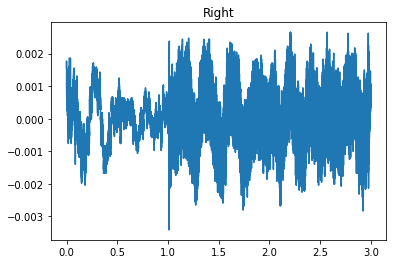

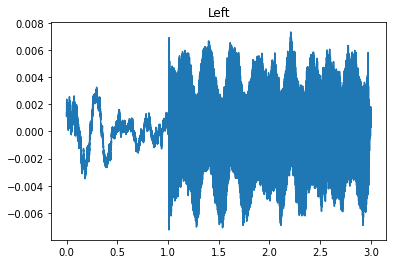

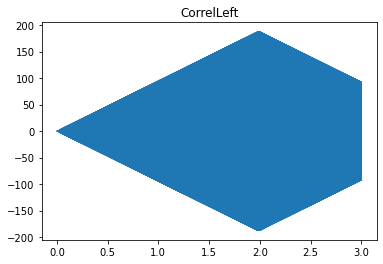

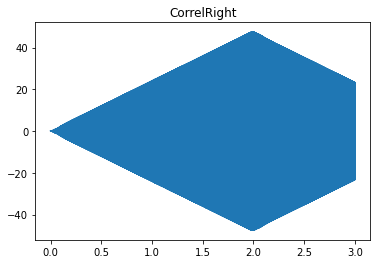

In [22]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
#Bibliothèques pour générer, acquérir les sons
import traitsignfip
from importlib import reload
reload(traitsignfip)

data_left, data_right = traitsignfip.play_and_record("sinus",2)

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.50#Distance entre les deux micros en mètre

#affichage du channel 1 
plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

corrLeft=scipy.signal.correlate(data_left,traitsignfip.samples, mode='same')
corrRight=scipy.signal.correlate(data_right,traitsignfip.samples, mode='same')
# Calcul de la corrélation croisée entre les deux signaux

plt.figure()
plt.title("CorrelLeft")
plt.plot(n,corrLeft)
#Intercorrélation gauche 
plt.figure()
plt.title("CorrelRight")
plt.plot(n,corrRight)
#Intercorrélation droite 

# Trouver l'indice du maximum de la corrélation
max_index_Left = np.argmax(corrLeft)/fs
max_index_Right = np.argmax(corrRight)/fs

delta_t = np.abs(max_index_Left - max_index_Right)

print("Temps PIC Gauche : "+str(max_index_Left))
print("Temps PIC Droit : "+str(max_index_Right))

print("Delta : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")


# Sans haut-parleur : Utiliser un clap de main et faire la corrélation entre les deux signaux et récupérer la valeur max

1.4224263038548752
0.5775736961451248
Delta t : 0.5775736961451248
Vitesse : 0.8656903929959561 m/s


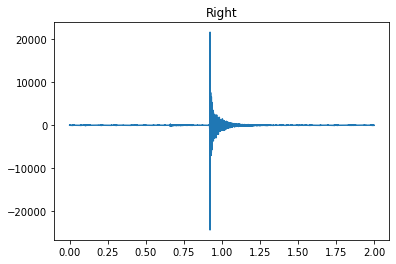

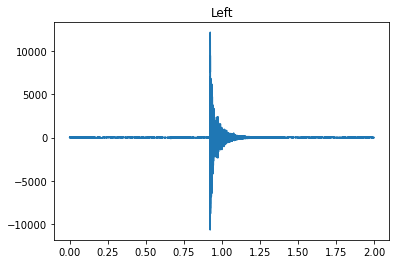

In [367]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip
from importlib import reload
reload(traitesignfip)

traitesignfip.record()

data_left, data_right = traitesignfip.read_signal()

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.5#Distance entre les deux micros en mètre


plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

corr = scipy.signal.correlate(data_right,data_left,mode="same")
corr2 = scipy.signal.correlate(data_left,data_right,mode="same")

print(np.argmax(corr)/44100)
print(np.argmax(corr2)/44100)

delta_t = min(np.argmax(corr)/44100,np.argmax(corr2)/44100)

print("Delta t : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")



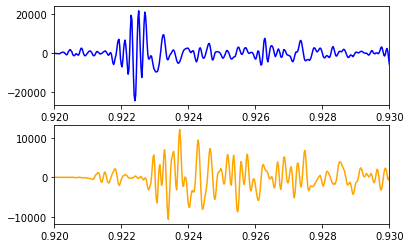

In [375]:
plt.figure(1)
plt.subplot(211)
plt.plot(n,data_right,color='blue')
plt.xlim(0.92,0.93)
plt.subplot(212)
plt.plot(n,data_left,color='orange')
plt.xlim(0.92,0.93)
plt.show()



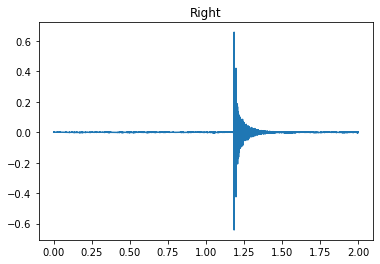

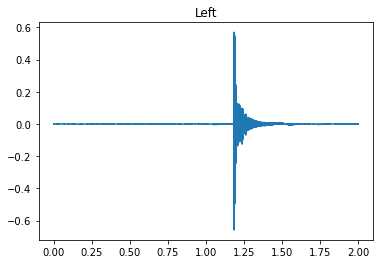

In [13]:
import traitsignfip as trt
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(trt)

data_left,data_right = trt.record()

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.5#Distance entre les deux micros en mètre

plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

